In [ ]:
# https://api.mtr.pub/fabianppk/Google-Data-Analytics-Capstone---Case-Study-1/blob/main/Capstonev2.R

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [4]:
bike = pd.read_csv("DataSets\\bike_share_new.csv")

In [3]:
bike.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,2,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,3,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,4,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,5,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [4]:
bike.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [5]:
bike = bike.drop(columns="Unnamed: 0")


In [6]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [7]:
bike.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [8]:
bike["started_at"] = pd.to_datetime(bike["started_at"])
bike["ended_at"] = pd.to_datetime(bike["ended_at"])
bike.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [9]:
#Calculating total ride length
bike["ride_length"] = bike["ended_at"] - bike["started_at"]
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member,0 days 00:02:43
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member,0 days 00:06:17
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member,0 days 00:05:59
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member,0 days 00:25:50
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member,0 days 00:04:08


In [10]:
bike['day_of_week'] = bike["started_at"].apply(lambda x:x.weekday())

In [11]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member,0 days 00:02:43,6
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member,0 days 00:06:17,4
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member,0 days 00:05:59,4
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member,0 days 00:25:50,3
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member,0 days 00:04:08,4


In [12]:
week  = {0:"Sunday",
        1:"Monday",
        2:"Tuesday",
        3:"Wednesday",
        4:"Thursday",
        5:"Friday",
        6:"Saturday"}

In [13]:
 bike["day_of_week1"] = bike["day_of_week"].apply(lambda x:week[x])

In [14]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_of_week1
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member,0 days 00:02:43,6,Saturday
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member,0 days 00:06:17,4,Thursday
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member,0 days 00:05:59,4,Thursday
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member,0 days 00:25:50,3,Wednesday
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member,0 days 00:04:08,4,Thursday


In [15]:
bike.sort_values(["started_at"],ascending=False,inplace=True)

In [16]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_of_week1
5284214,761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,41.92416,-87.64638,41.92217,-87.63889,casual,0 days 00:04:08,1,Monday
5832257,C4E039D12FA2F959,electric_bike,2022-05-31 23:59:38,2022-06-01 00:05:02,NaN,NaN,NaN,NaN,41.94000,-87.65000,41.95000,-87.65000,member,0 days 00:05:24,1,Monday
5242055,A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,41.91299,-87.66419,41.91292,-87.66417,member,0 days 00:00:57,1,Monday
5640188,6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,41.83820,-87.64514,41.87208,-87.62954,member,0 days 00:23:34,1,Monday
5731986,02C62B16DD557A08,electric_bike,2022-05-31 23:59:19,2022-06-01 00:04:12,NaN,NaN,Clark St & Grace St,TA1307000127,41.94000,-87.66000,41.95078,-87.65917,casual,0 days 00:04:53,1,Monday


In [17]:
bike.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    823167
start_station_id      823164
end_station_name      878338
end_station_id        878338
start_lat                  0
start_lng                  0
end_lat                 5036
end_lng                 5036
member_casual              0
ride_length                0
day_of_week                0
day_of_week1               0
dtype: int64

In [18]:
bike.dropna(inplace=True)
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_of_week1
5284214,761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,41.92416,-87.64638,41.92217,-87.63889,casual,0 days 00:04:08,1,Monday
5242055,A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,41.91299,-87.66419,41.91292,-87.66417,member,0 days 00:00:57,1,Monday
5640188,6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,41.83820,-87.64514,41.87208,-87.62954,member,0 days 00:23:34,1,Monday
5581406,6ED3382A3CB98D86,classic_bike,2022-05-31 23:58:38,2022-06-01 00:30:36,Wabash Ave & Wacker Pl,TA1307000131,Fairbanks Ct & Grand Ave,TA1305000003,41.88688,-87.62603,41.89185,-87.62058,member,0 days 00:31:58,1,Monday
5349263,60B78F8A1BEF98DF,classic_bike,2022-05-31 23:58:08,2022-06-01 00:07:38,Marine Dr & Ainslie St,KA1504000171,Broadway & Ridge Ave,15578,41.97160,-87.65015,41.98404,-87.66027,member,0 days 00:09:30,1,Monday


In [19]:
bike.count()

ride_id               4667299
rideable_type         4667299
started_at            4667299
ended_at              4667299
start_station_name    4667299
start_station_id      4667299
end_station_name      4667299
end_station_id        4667299
start_lat             4667299
start_lng             4667299
end_lat               4667299
end_lng               4667299
member_casual         4667299
ride_length           4667299
day_of_week           4667299
day_of_week1          4667299
dtype: int64

In [20]:
bike.to_csv("DataSets\\bike_clean.csv")

In [21]:
bike_clean = pd.read_csv("DataSets\\bike_clean.csv")

In [22]:
bike_clean.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_of_week1
0,5284214,761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,41.92416,-87.64638,41.92217,-87.63889,casual,0 days 00:04:08,1,Monday
1,5242055,A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,41.91299,-87.66419,41.91292,-87.66417,member,0 days 00:00:57,1,Monday
2,5640188,6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,41.83820,-87.64514,41.87208,-87.62954,member,0 days 00:23:34,1,Monday
3,5581406,6ED3382A3CB98D86,classic_bike,2022-05-31 23:58:38,2022-06-01 00:30:36,Wabash Ave & Wacker Pl,TA1307000131,Fairbanks Ct & Grand Ave,TA1305000003,41.88688,-87.62603,41.89185,-87.62058,member,0 days 00:31:58,1,Monday
4,5349263,60B78F8A1BEF98DF,classic_bike,2022-05-31 23:58:08,2022-06-01 00:07:38,Marine Dr & Ainslie St,KA1504000171,Broadway & Ridge Ave,15578,41.97160,-87.65015,41.98404,-87.66027,member,0 days 00:09:30,1,Monday


In [23]:
bike_clean.drop(columns="Unnamed: 0",inplace=True)
bike_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_of_week1
0,761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,41.92416,-87.64638,41.92217,-87.63889,casual,0 days 00:04:08,1,Monday
1,A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,41.91299,-87.66419,41.91292,-87.66417,member,0 days 00:00:57,1,Monday
2,6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,41.83820,-87.64514,41.87208,-87.62954,member,0 days 00:23:34,1,Monday
3,6ED3382A3CB98D86,classic_bike,2022-05-31 23:58:38,2022-06-01 00:30:36,Wabash Ave & Wacker Pl,TA1307000131,Fairbanks Ct & Grand Ave,TA1305000003,41.88688,-87.62603,41.89185,-87.62058,member,0 days 00:31:58,1,Monday
4,60B78F8A1BEF98DF,classic_bike,2022-05-31 23:58:08,2022-06-01 00:07:38,Marine Dr & Ainslie St,KA1504000171,Broadway & Ridge Ave,15578,41.97160,-87.65015,41.98404,-87.66027,member,0 days 00:09:30,1,Monday


In [24]:
bike_clean["year"] = pd.DatetimeIndex(bike_clean["started_at"]).year
bike_clean["month"] = pd.DatetimeIndex(bike_clean["started_at"]).month
bike_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_of_week1,year,month
0,761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,41.924160,-87.646380,41.922170,-87.638890,casual,0 days 00:04:08,1,Monday,2022,5
1,A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,41.912990,-87.664190,41.912920,-87.664170,member,0 days 00:00:57,1,Monday,2022,5
2,6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,41.838200,-87.645140,41.872080,-87.629540,member,0 days 00:23:34,1,Monday,2022,5
3,6ED3382A3CB98D86,classic_bike,2022-05-31 23:58:38,2022-06-01 00:30:36,Wabash Ave & Wacker Pl,TA1307000131,Fairbanks Ct & Grand Ave,TA1305000003,41.886880,-87.626030,41.891850,-87.620580,member,0 days 00:31:58,1,Monday,2022,5
4,60B78F8A1BEF98DF,classic_bike,2022-05-31 23:58:08,2022-06-01 00:07:38,Marine Dr & Ainslie St,KA1504000171,Broadway & Ridge Ave,15578,41.971600,-87.650150,41.984040,-87.660270,member,0 days 00:09:30,1,Monday,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667294,B3FF187BD7319339,docked_bike,2021-06-01 00:02:58,2021-06-01 01:12:33,Wabash Ave & 9th St,TA1309000010,Wabash Ave & 9th St,TA1309000010,41.870769,-87.625734,41.870769,-87.625734,casual,0 days 01:09:35,1,Monday,2021,6
4667295,032100DB251FD86C,electric_bike,2021-06-01 00:02:06,2021-06-01 01:32:12,Millennium Park,13008,Wabash Ave & Adams St,KA1503000015,41.881190,-87.624100,41.879060,-87.625620,casual,0 days 01:30:06,1,Monday,2021,6
4667296,0E9702B5AFFC73D0,electric_bike,2021-06-01 00:01:00,2021-06-01 00:08:19,Perry Ave & 69th St,KA1503000047,May St & 69th St,567,41.769290,-87.628210,41.768900,-87.652940,casual,0 days 00:07:19,1,Monday,2021,6
4667297,07DDAE10F8C4A9B7,electric_bike,2021-06-01 00:00:59,2021-06-01 01:09:31,Wabash Ave & 9th St,TA1309000010,Wabash Ave & 9th St,TA1309000010,41.870432,-87.625719,41.870905,-87.625706,casual,0 days 01:08:32,1,Monday,2021,6


In [25]:
month={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
bike_clean["month1"] = bike_clean["month"].apply(lambda x:month[x])
bike_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_of_week1,year,month,month1
0,761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,41.92416,-87.64638,41.92217,-87.63889,casual,0 days 00:04:08,1,Monday,2022,5,May
1,A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,41.91299,-87.66419,41.91292,-87.66417,member,0 days 00:00:57,1,Monday,2022,5,May
2,6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,41.83820,-87.64514,41.87208,-87.62954,member,0 days 00:23:34,1,Monday,2022,5,May
3,6ED3382A3CB98D86,classic_bike,2022-05-31 23:58:38,2022-06-01 00:30:36,Wabash Ave & Wacker Pl,TA1307000131,Fairbanks Ct & Grand Ave,TA1305000003,41.88688,-87.62603,41.89185,-87.62058,member,0 days 00:31:58,1,Monday,2022,5,May
4,60B78F8A1BEF98DF,classic_bike,2022-05-31 23:58:08,2022-06-01 00:07:38,Marine Dr & Ainslie St,KA1504000171,Broadway & Ridge Ave,15578,41.97160,-87.65015,41.98404,-87.66027,member,0 days 00:09:30,1,Monday,2022,5,May


In [26]:
bike_clean.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
day_of_week1          0
year                  0
month                 0
month1                0
dtype: int64

In [27]:
bike_clean.duplicated().any()

False

In [28]:
bike_clean.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
ride_length            object
day_of_week             int64
day_of_week1           object
year                    int64
month                   int64
month1                 object
dtype: object

In [29]:
bike_clean["started_at"] = pd.to_datetime(bike_clean["started_at"])
bike_clean["ended_at"] = pd.to_datetime(bike_clean["ended_at"])
bike_clean["ride_length"] = pd.to_timedelta(bike_clean["ride_length"])
bike_clean.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_length           timedelta64[ns]
day_of_week                     int64
day_of_week1                   object
year                            int64
month                           int64
month1                         object
dtype: object

In [30]:
ride_len_mean = bike_clean["ride_length"].mean()
ride_len_mean

Timedelta('0 days 00:20:12.843870726')

In [31]:
ride_len_max = bike_clean["ride_length"].max()
ride_len_max

Timedelta('38 days 20:24:09')

In [32]:
day_of_week_mode = bike_clean["day_of_week1"].mode()
day_of_week_mode

0    Friday
dtype: object

In [33]:
month_mode = bike_clean["month1"].mode()
month_mode

0    Jul
dtype: object

In [34]:
casual_ride_len_mean = bike_clean[bike_clean["member_casual"] == "casual"]["ride_length"].mean()
casual_ride_len_mean

Timedelta('0 days 00:30:06.016790533')

In [35]:
member_ride_len_mean = bike_clean[bike_clean["member_casual"] == "member"]["ride_length"].mean()
member_ride_len_mean

Timedelta('0 days 00:12:40.530999982')

In [36]:
count_day_of_week = bike_clean.groupby(["day_of_week"])["ride_id"].count()
count_day_of_week

day_of_week
0    609955
1    643073
2    632732
3    639635
4    644064
5    799062
6    698778
Name: ride_id, dtype: int64

In [37]:
casual_count_day_of_week = bike_clean[bike_clean["member_casual"] == "casual"].groupby(["day_of_week"])["ride_id"].count()
casual_count_day_of_week

day_of_week
0    234505
1    218156
2    217439
3    236564
4    279860
5    448062
6    384647
Name: ride_id, dtype: int64

In [38]:
member_count_day_of_week = bike_clean[bike_clean["member_casual"] == "member"].groupby(["day_of_week"])["ride_id"].count()
member_count_day_of_week

day_of_week
0    375450
1    424917
2    415293
3    403071
4    364204
5    351000
6    314131
Name: ride_id, dtype: int64

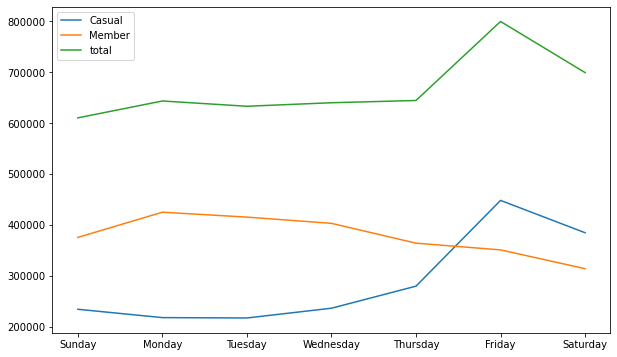

In [51]:
plt.figure(figsize=(10,6))
plt.plot(casual_count_day_of_week.index,casual_count_day_of_week.values)
plt.plot(member_count_day_of_week.index,member_count_day_of_week.values)
plt.plot(count_day_of_week.index,count_day_of_week.values)
plt.legend(["Casual", "Member", "total"])
plt.xticks(count_day_of_week.index,["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.show()

In [41]:
bike_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_of_week1,year,month,month1
0,761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,41.92416,-87.64638,41.92217,-87.63889,casual,0 days 00:04:08,1,Monday,2022,5,May
1,A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,41.91299,-87.66419,41.91292,-87.66417,member,0 days 00:00:57,1,Monday,2022,5,May
2,6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,41.83820,-87.64514,41.87208,-87.62954,member,0 days 00:23:34,1,Monday,2022,5,May
3,6ED3382A3CB98D86,classic_bike,2022-05-31 23:58:38,2022-06-01 00:30:36,Wabash Ave & Wacker Pl,TA1307000131,Fairbanks Ct & Grand Ave,TA1305000003,41.88688,-87.62603,41.89185,-87.62058,member,0 days 00:31:58,1,Monday,2022,5,May
4,60B78F8A1BEF98DF,classic_bike,2022-05-31 23:58:08,2022-06-01 00:07:38,Marine Dr & Ainslie St,KA1504000171,Broadway & Ridge Ave,15578,41.97160,-87.65015,41.98404,-87.66027,member,0 days 00:09:30,1,Monday,2022,5,May


In [43]:
count_month = bike_clean.groupby("month1")["ride_id"].count()

In [44]:
count_month

month1
Apr    272560
Aug    674409
Dec    176371
Feb     89178
Jan     80128
Jul    692321
Jun    608778
Mar    215983
May    502545
Nov    255904
Oct    477972
Sep    621150
Name: ride_id, dtype: int64

In [55]:
member_count_month = bike_clean[bike_clean["member_casual"] == "member"].groupby("month")["ride_id"].count()
member_count_month

month
1      67523
2      74034
3     148827
4     180663
5     282299
6     304586
7     322906
8     332933
9     328219
10    288855
11    185926
12    131295
Name: ride_id, dtype: int64

In [56]:
casual_count_month = bike_clean[bike_clean["member_casual"] == "casual"].groupby("month")["ride_id"].count()
casual_count_month

month
1      12605
2      15144
3      67156
4      91897
5     220246
6     304192
7     369415
8     341476
9     292931
10    189117
11     69978
12     45076
Name: ride_id, dtype: int64

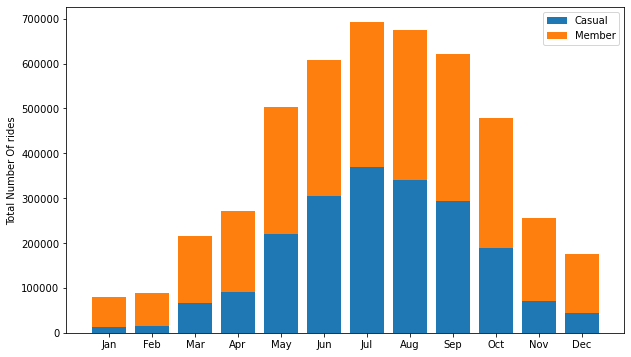

In [69]:
plt.figure(figsize=(10,6))
plt.bar(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],casual_count_month.values)
plt.bar(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],member_count_month.values,bottom=casual_count_month.values)
plt.legend(["Casual", "Member"])
plt.ylabel("Total Number Of rides")
plt.show()

In [79]:
cout_rideble_type =  bike_clean.groupby("rideable_type")["ride_id"].count()

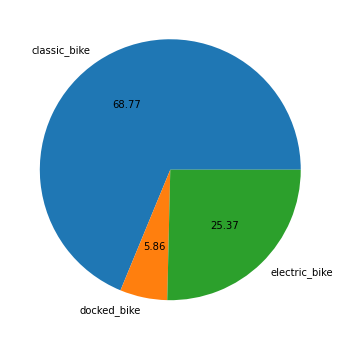

In [90]:
plt.figure(figsize=(6,6))
plt.pie(cout_rideble_type,labels=cout_rideble_type.index,autopct="%.2f")
plt.show()

In [59]:
line = bike_clean.groupby('started_at')['ride_id'].count()

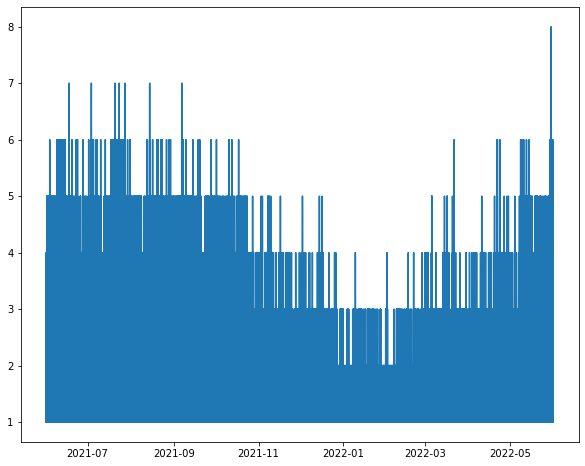

In [61]:
plt.figure(figsize=(10,8))

plt.plot(line.index,line.values)

In [76]:
bike_clean["ride_length_minuts"] = bike_clean["ride_length"].apply(lambda x:x.total_seconds() / 60)

In [83]:
ride_lenght_member_type = bike_clean.groupby("member_casual")["ride_length_minuts"].sum()
ride_lenght_member_type

member_casual
casual    6.077948e+07
member    3.356560e+07
Name: ride_length_minuts, dtype: float64

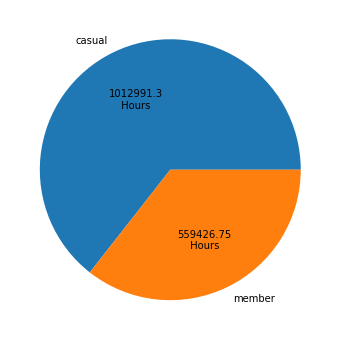

In [104]:
plt.figure(figsize=(6,6))
p, tx, autotexts =  plt.pie(ride_lenght_member_type,labels=ride_lenght_member_type.index,autopct='')

for i, a in enumerate(autotexts):
    a.set_text("{}\n Hours ".format(round(ride_lenght_member_type.values[i])/60))

plt.show()

In [123]:
ride_lenght_bike_type_member  = bike_clean[bike_clean["member_casual"] == "member"].groupby(["rideable_type","member_casual"])["ride_length_minuts"].sum()
ride_lenght_bike_type_member

rideable_type  member_casual
classic_bike   member           2.594876e+07
electric_bike  member           7.616844e+06
Name: ride_length_minuts, dtype: float64

In [137]:
ride_lenght_bike_type_member_list = []
ride_lenght_bike_type_member_list.append(ride_lenght_bike_type_member.values[0])
ride_lenght_bike_type_member_list.append(0)
ride_lenght_bike_type_member_list.append(ride_lenght_bike_type_member.values[1])
ride_lenght_bike_type_member_list

[25948760.650002748, 0, 7616844.066666576]

In [124]:
ride_lenght_bike_type_casual= bike_clean[bike_clean["member_casual"] == "casual"].groupby(["rideable_type","member_casual"])["ride_length_minuts"].sum()
ride_lenght_bike_type_casual

rideable_type  member_casual
classic_bike   casual           3.134074e+07
docked_bike    casual           1.963152e+07
electric_bike  casual           9.807217e+06
Name: ride_length_minuts, dtype: float64

In [126]:
ride_lenght_bike_type_casual.index

MultiIndex([( 'classic_bike', 'casual'),
            (  'docked_bike', 'casual'),
            ('electric_bike', 'casual')],
           names=['rideable_type', 'member_casual'])

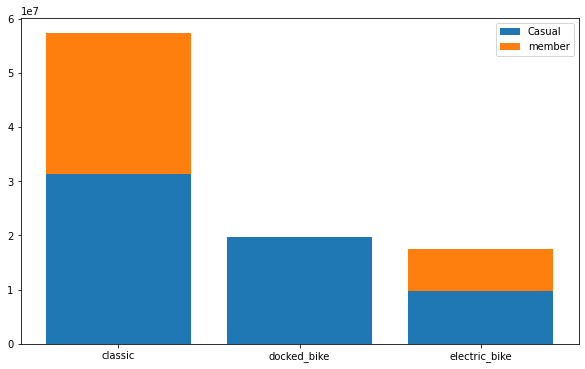

In [142]:
plt.figure(figsize=(10,6))
plt.bar(["classic","docked_bike","electric_bike"],ride_lenght_bike_type_casual.values)
plt.bar(["classic","docked_bike","electric_bike"],ride_lenght_bike_type_member_list,bottom=ride_lenght_bike_type_casual.values)
plt.legend(['Casual','member'])
plt.show()

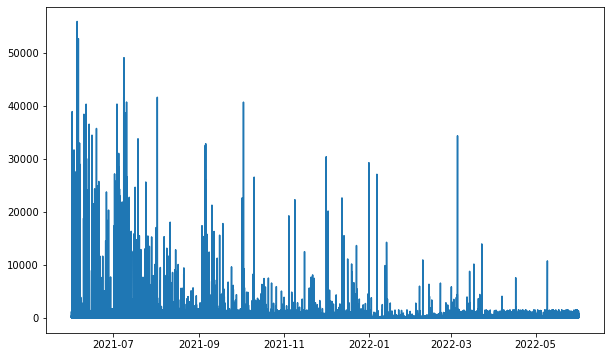

In [147]:
plt.figure(figsize=(10,6))
plt.plot (bike_clean['started_at'],bike_clean['ride_length_minuts'])
plt.show()

In [149]:
pip install squarify 

Note: you may need to restart the kernel to use updated packages.Collecting squarify



In [166]:
count_station = bike_clean.groupby('start_station_name')["ride_id"].count().sort_values(ascending = False)
count_station

start_station_name
Streeter Dr & Grand Ave          81597
Michigan Ave & Oak St            42258
Wells St & Concord Ln            41883
Millennium Park                  39297
Clark St & Elm St                38979
                                 ...  
Kimball Ave & Carmen Ave             1
Kildare Ave & Washignton Blvd        1
Kilbourn Ave & Fullerton Ave         1
Kedzie Ave & Pershing Rd             1
Zapata Academy                       1
Name: ride_id, Length: 1045, dtype: int64

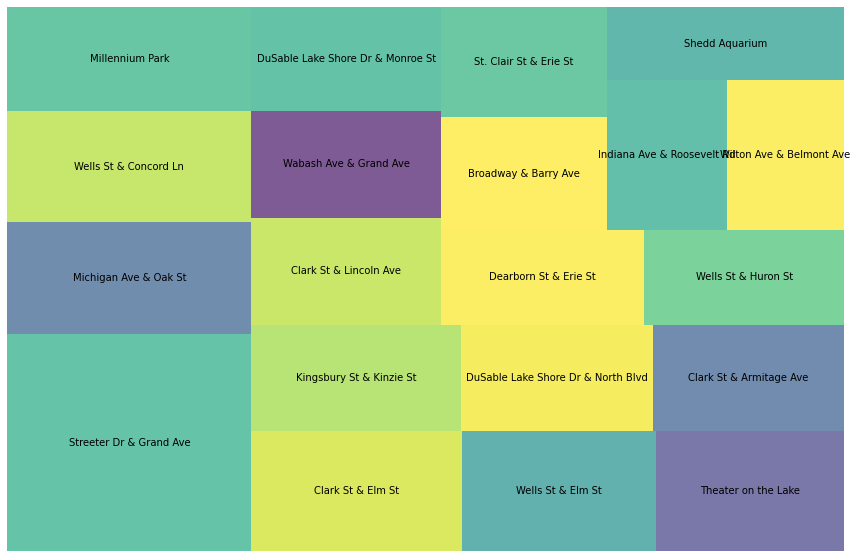

In [179]:
plt.figure(figsize=(15,10))
sizes=[100,50,23,74]
label=['A','B','C','D']
colors=['red','green','blue', 'yellow']
squarify.plot(count_station.values[:20], label=count_station.index[:20], alpha=0.7)
plt.axis('off')
plt.show()

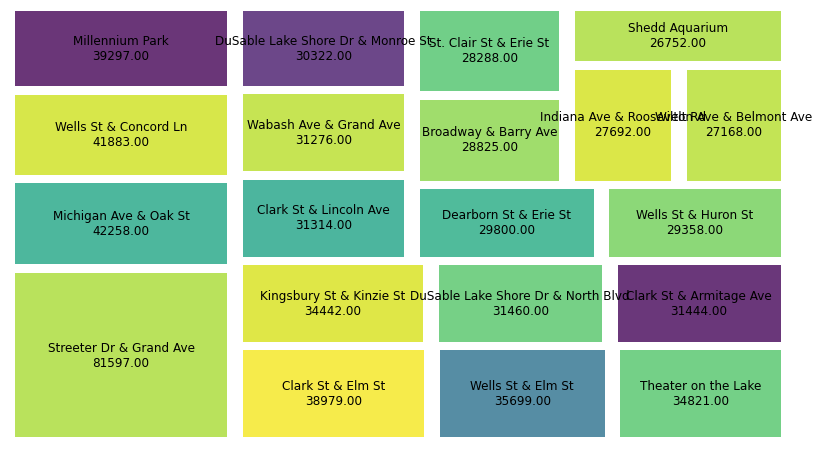

In [198]:
plt.figure(figsize=(14,8))

labels = ["%s\n%.2f" % (label) for label in zip(count_station.index[:20], count_station.values[:20])]


squarify.plot(count_station.values[:20], label=labels,alpha=0.8, pad=True, 
              text_kwargs={'color':'black', 'size':12})



plt.axis('off')
plt.show()
